In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# GJR-LEV-GARCH với yếu tố ngẫu nhiên

Cuộc khủng hoảng Credit Suisse là sự sụp đổ của Credit Suisse, một trong những tổ chức tài chính hàng đầu Thụy Sĩ, vào tháng 3 năm 2023. Sự việc này đã dẫn đến việc Credit Suisse bị đối thủ là UBS Group AG mua lại. Động thái này nhằm củng cố hệ thống ngân hàng toàn cầu và ngăn chặn một cuộc sụp đổ hoàn toàn có thể gây thiệt hại nặng nề cho hệ thống tài chính $^{[2]}$.

### 2.2. Nguyên nhân

### 2.3. Ý tưởng ban đầu cho mô hình toán học

- **$\alpha_i \epsilon_{t-i}^2$** (hiệu ứng ARCH): phản ánh tác động ngắn hạn của các cú sốc quá khứ thông qua sai số bình phương. Cú sốc càng lớn, phương sai hiện tại càng tăng.
- **$\beta_j \sigma_{t-j}^2$** (hiệu ứng GARCH): thể hiện trí nhớ dài hạn của biến động. Phương sai quá khứ cao sẽ kéo dài biến động sang hiện tại.
- **$\gamma Z_t$** (biến ngoại sinh): cho phép độ biến động phản ứng với yếu tố bên ngoài như lãi suất, chỉ số kinh tế, tin tức, v.v.

## 3. Xây dựng mô hình toán học

### 3.1. Siêu tham số đầu vào (Hyperparameter)


Trong mô hình Cross-GARCH, nhóm chúng tôi nhận định rằng sự **biến động** (rủi ro) của thực thể kinh tế A không chỉ chịu tác động từ các yếu tố nội tại, mà còn bị chi phối bởi các yếu tố bên ngoài và lịch sử. Cụ thể, các nhân tố ảnh hưởng đến biến động của A bao gồm:

* **Vấn đề nội tại hiện tại:** Các yếu tố mang tính thời điểm của chính thực thể A, chẳng hạn như tỷ lệ an toàn vốn (CAR) thấp, có thể làm gia tăng rủi ro.
* **Vấn đề lịch sử của thực thể A:** Sự biến động trong quá khứ của A là một chỉ số quan trọng. Nếu A đã có xu hướng biến động mạnh trong giai đoạn gần đây, khả năng cao nó sẽ tiếp tục duy trì mức độ biến động đó.
* **Vấn đề lịch sử của các thực thể khác trong cùng hệ thống:** Biến động của các thực thể khác trong cùng một hệ thống tài chính cũng tác động lên A. Điều này thể hiện sự lây lan (spillover) rủi ro, khi các cú sốc từ một thực thể có thể lan truyền và ảnh hưởng đến toàn bộ hệ thống.

Trong mô hình Cross-GARCH, chúng tôi cho rằng giá trị của $\omega$ không được tính toán trực tiếp từ dữ liệu một cách đơn giản như phương sai thông thường. Thay vào đó, nó là một tham số cần được ước lượng (estimated parameter) thông qua các phương pháp thống kê như phương pháp hợp lý tối đa (Maximum Likelihood Estimation - MLE) khi chạy mô hình.

### 3.2. Mô hình toán học (Mathematical Model)

$$
\sigma_{t}^2 = \omega + \sum_{i=1}^{p}\alpha_{i}\epsilon_{t-i}^2 + \sum_{i=1}^{p}\gamma_{i}I_{t-i}\epsilon_{t-i}^2 + \sum_{j=1}^{q}\beta_{j}\sigma_{t-j}^2 + \gamma Z_t
$$

- $ \sigma_{t}^2 $: Phương sai có điều kiện của chuỗi thời gian tại thời điểm t. Đây là mức độ biến động mà bạn muốn mô hình hóa.
- $ \omega $: Một hằng số dương, đại diện cho phương sai cơ sở hoặc phương sai dài hạn của chuỗi.
- $ \sum_{i=1}^{p}\alpha_{i}\epsilon_{t-i}^2 $: Thành phần ARCH.
    - $ \epsilon_{t-i}^2 $: Sai số bình phương tại thời điểm quá khứ t−i. Sai số này thể hiện các cú sốc (shocks) đã xảy ra trên thị trường.
    - $ \alpha_{i} $: Hệ số đo lường mức độ tác động của các cú sốc trong quá khứ lên phương sai hiện tại. Một giá trị $ \alpha $ lớn cho thấy phương sai hiện tại phản ứng mạnh với các cú sốc gần đây.
- $\sum_{i=1}^{p}\gamma_{i}I_{t-i}\epsilon_{t-i}^2$: **Thành phần bất đối xứng (asymmetry component)**: Đây là điểm mấu chốt của GJR-GARCH. Nó cho phép các cú sốc tiêu cực có tác động khác biệt so với các cú sốc tích cực.
    - $I_{t-i}$: Một biến chỉ báo (indicator variable). Nó có giá trị là 1 nếu $\epsilon_{t-i}$ âm (tức là có cú sốc tiêu cực), và 0 nếu $\epsilon_{t-i}$ dương.
    - $\gamma_{i}$: Hệ số bất đối xứng. Nếu $\gamma_{i}$ dương và có ý nghĩa thống kê, điều đó khẳng định **hiệu ứng đòn bẩy** tồn tại, tức là các cú sốc tiêu cực làm tăng biến động mạnh hơn các cú sốc tích cực.
- $ \sum_{j=1}^{q}\beta_{j}\sigma_{t-j}^2 $: Thành phần GARCH.
    - $ \sigma_{t-j}^2 $: Phương sai có điều kiện tại thời điểm quá khứ t−j.
    - $ \beta_{j} $: Hệ số đo lường sự "dai dẳng" của phương sai. Một giá trị $ \beta $ lớn cho thấy biến động cao có xu hướng kéo dài trong một thời gian dài.
- $ \gamma Z_t $: Thành phần ngẫu nhiên mở rộng.
    -$ Z_t $: Một biến ngẫu nhiên độc lập (ví dụ, một biến ngẫu nhiên theo phân phối chuẩn) tại thời điểm t. Nó đại diện cho các cú sốc ngẫu nhiên, không thể giải thích được bằng các thành phần còn lại của mô hình.
    - $ \gamma $: Hệ số đo lường mức độ tác động của cú sốc ngẫu nhiên này lên phương sai.

### 3.3. Mã Python mô phỏng

In [10]:
def simulate_garch_and_price(omega, alpha, p, beta, q, gamma_val, days, r0):
    """
    Mô phỏng phương sai có điều kiện và giá thị trường X của một chuỗi thời gian
    theo mô hình GARCH(p,q) mở rộng.

    Args:
        omega (float): Hằng số của phương trình GARCH.
        alpha (list): Hệ số GARCH cho sai số bình phương.
        p (int): Bậc của thành phần ARCH.
        beta (list): Hệ số GARCH cho phương sai quá khứ.
        q (int): Bậc của thành phần GARCH.
        gamma_val (float): Hệ số của cú sốc ngẫu nhiên.
        days (int): Số ngày mô phỏng.
        r0 (float): Giá trị ban đầu của chuỗi giá.

    Returns:
        tuple: Một tuple chứa hai mảng NumPy:
                - sigma2: Phương sai có điều kiện.
                - prices: Giá thị trường X.
    """
    # Kiểm tra tính hợp lệ của bậc và số lượng hệ số
    if p != len(alpha) or q != len(beta):
        raise ValueError(
            "Số lượng hệ số alpha phải bằng p và số lượng hệ số beta phải bằng q."
        )

    # Khởi tạo các mảng
    sigma2 = np.zeros(days)
    returns = np.zeros(days)
    prices = np.zeros(days)
    
    # Khởi tạo giá trị ban đầu cho phương sai
    # Giả định tổng (alpha + beta) < 1 để đảm bảo phương sai dài hạn là dương và ổn định
    long_run_variance = omega / (1 - np.sum(alpha) - np.sum(beta))
    
    # Khởi tạo các giá trị lịch sử
    for i in range(max(p, q, 1)):
        if i < days:
            sigma2[i] = long_run_variance
            returns[i] = np.random.normal(0, np.sqrt(sigma2[i]))
            prices[i] = r0 + np.sum(returns[:i+1])

    # Tạo các cú sốc ngẫu nhiên cho toàn bộ chuỗi
    random_shocks = np.random.normal(0, 1, days)
    
    # Mô phỏng
    for t in range(max(p, q), days):
        # Tính thành phần ARCH
        alpha_term = np.sum(alpha * returns[t-p:t]**2)
        
        # Tính thành phần GARCH
        beta_term = np.sum(beta * sigma2[t-q:t])
        
        # Thành phần ngẫu nhiên mở rộng
        random_term = gamma_val * random_shocks[t]
        
        # Tính phương sai mới, đảm bảo luôn dương
        sigma2[t] = omega + alpha_term + beta_term + random_term
        if sigma2[t] < 0:
            sigma2[t] = np.abs(sigma2[t])

        # Tạo lợi suất mới dựa trên phương sai
        returns[t] = np.random.normal(0, np.sqrt(sigma2[t]))
        
        # Cập nhật giá dựa trên lợi suất
        prices[t] = prices[t-1] + returns[t]
        
    return sigma2, prices

In [31]:
def example_01():
    # --- Ví dụ cách sử dụng hàm ---
    
    # Định nghĩa các siêu tham số cho mô hình GARCH
    omega_val = 0.001
    
    # Cung cấp p và q cho mô hình GARCH(1,1)
    p_val = 1
    q_val = 1
    
    alpha_val = np.array([0.15])
    beta_val = np.array([0.45])
    gamma_val = 0.008  # Hệ số của cú sốc ngẫu nhiên
    
    # Số ngày mô phỏng
    days_val = 2500
    r0_val = 100.0  # Giá ban đầu
    
    # Chạy mô phỏng
    simulated_sigma2, simulated_prices = simulate_garch_and_price(
        omega_val, alpha_val, p_val, beta_val, q_val, gamma_val, days_val, r0_val
    )

    print(f"Size of simulated data: {len(simulated_prices)}")
    # In ra 10 giá trị đầu tiên của phương sai
    print("10 giá trị phương sai đầu tiên:", simulated_sigma2[:10])
    print("10 giá trị giá đầu tiên:", simulated_prices[:10])

    # --- Trực quan hóa kết quả ---
    # Biểu đồ phương sai
    plt.figure(figsize=(20, 6))
    plt.plot(simulated_sigma2, label=f'Phương sai GARCH({p_val},{q_val})')
    plt.title('Mô phỏng mô hình GARCH với cú sốc ngẫu nhiên')
    plt.xlabel('Ngày')
    plt.ylabel('Phương sai')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Biểu đồ giá
    plt.figure(figsize=(20, 6))
    plt.plot(simulated_prices, label='Giá thị trường X', color='orange')
    plt.title('Mô phỏng chuỗi giá thị trường')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.sqrt(simulated_sigma2[-1])

Size of simulated data: 2500
10 giá trị phương sai đầu tiên: [0.0025     0.00255694 0.01746283 0.00286432 0.00121859 0.01119615
 0.01169762 0.0132863  0.00412618 0.0109564 ]
10 giá trị giá đầu tiên: [ 99.99532565 100.11843219 100.16489057 100.04960739 100.01529313
 100.08443686 100.17760396 100.10863763 100.03553068 100.17010903]


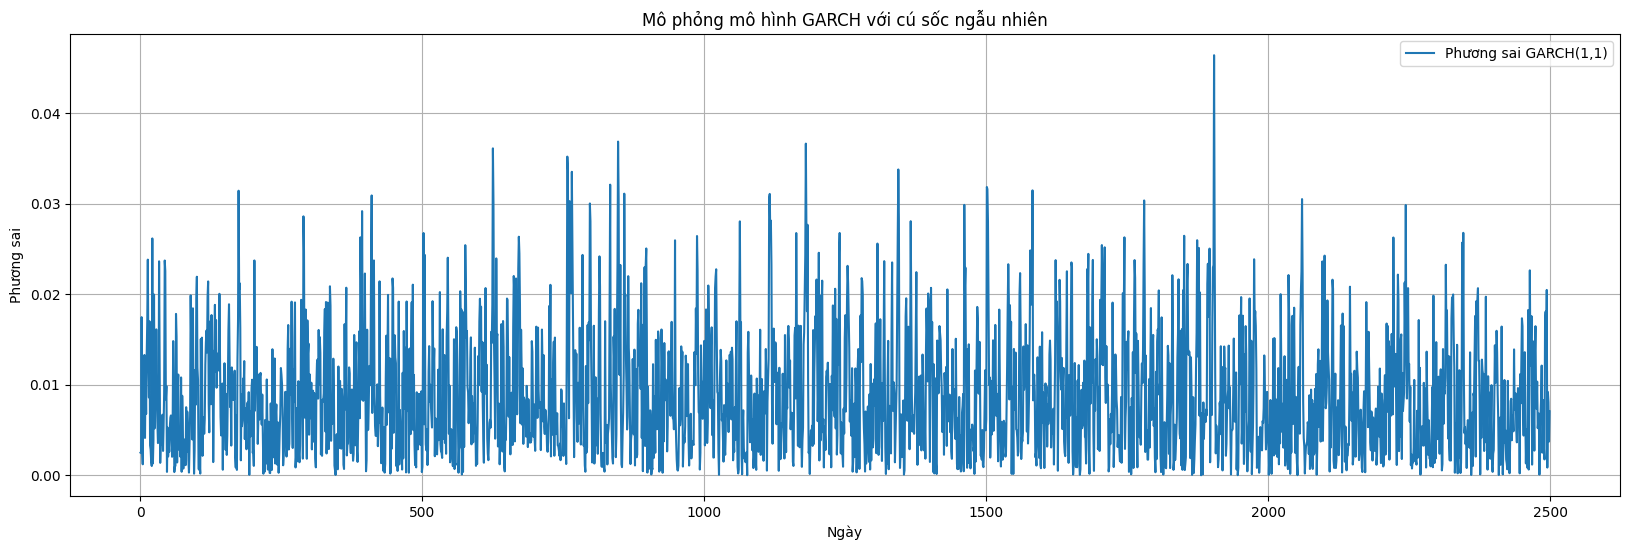

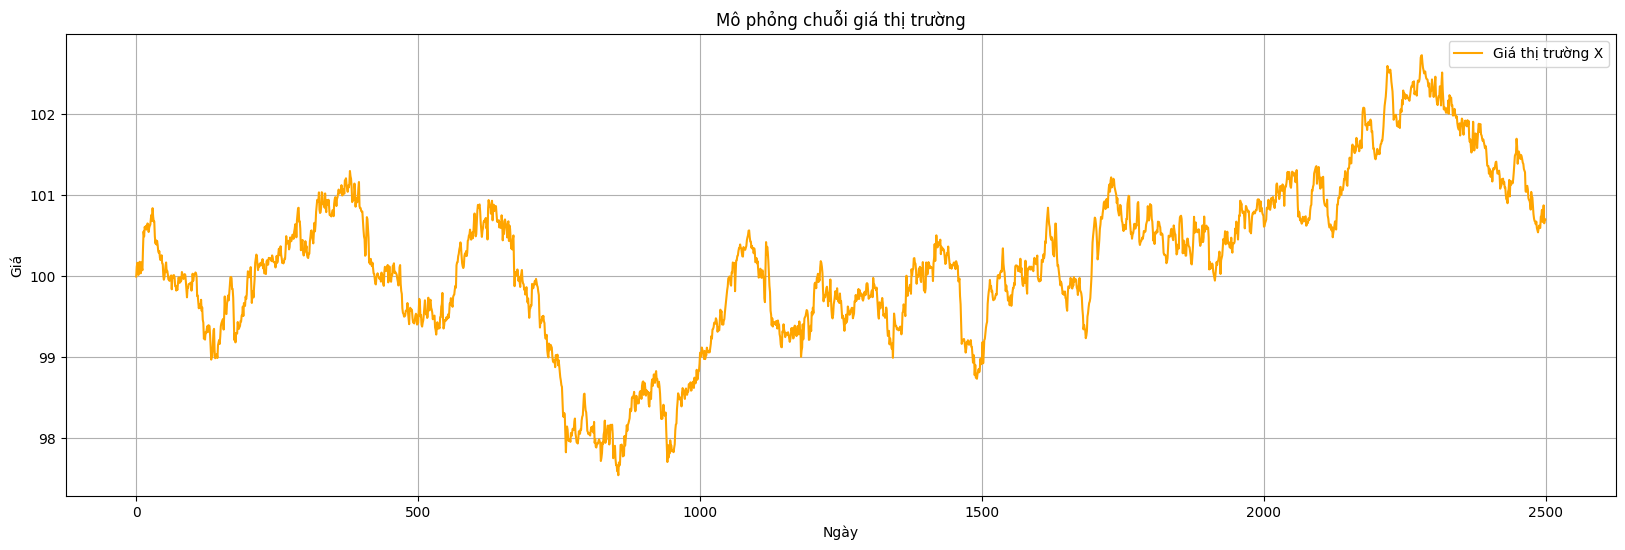

In [32]:
sigma = example_01()

## 4. Tính các chỉ số liên quan

### 4.1. Tính $\mu$

In [40]:
from pathlib import Path

notebook_path = Path().resolve()
base_dir = notebook_path.parent
print(f"Đường dẫn của thư mục gốc là: {base_dir}")

sub_folder = "market_data"
file_name = "CDS_5Y_CS_1D.csv"

# Nối các đường dẫn bằng toán tử /
full_path = base_dir / "data" / "silver" / "market_data" / "PRICE_CS_1D.csv"
print(f'Full path: {full_path}')

Đường dẫn của thư mục gốc là: C:\Users\VICTUS\Documents\developer\summer2025\tmh2025\tmh2025-round02
Full path: C:\Users\VICTUS\Documents\developer\summer2025\tmh2025\tmh2025-round02\data\silver\market_data\PRICE_CS_1D.csv


In [42]:
df = pd.read_csv(full_path)
df['close']

0        9.9100
1       10.0700
2       10.0700
3       10.0700
4       10.3200
         ...   
998      0.8858
999      0.8858
1000     0.8858
1001     0.8858
1002     0.8858
Name: close, Length: 1003, dtype: float64

In [43]:
from statsmodels.tsa.arima.model import ARIMA

def calculate_mu_with_arima(prices: pd.Series, order: tuple = (1, 0, 1)) -> float:
    """
    Ước tính lợi suất trung bình (mu) của một chuỗi giá bằng cách sử dụng mô hình ARMA.
    (ARIMA(p, 0, q)).

    Args:
        prices (pd.Series): Một chuỗi Pandas chứa giá lịch sử của tài sản.
        order (tuple): Bộ ba (p, d, q) của mô hình ARIMA.
                       (p: bậc AR, d: bậc I, q: bậc MA). Mặc định là ARMA(1,1).

    Returns:
        float: Giá trị mu dự báo cho thời điểm tiếp theo.
    """
    # 1. Tính lợi suất log từ giá
    returns = np.log(prices).diff().dropna()

    if returns.empty:
        raise ValueError("Chuỗi lợi suất không đủ dữ liệu để tính toán.")

    # 2. Ước lượng mô hình ARIMA(p, 0, q)
    try:
        model = ARIMA(returns, order=order)
        fitted_model = model.fit()

        # 3. Dự báo mu cho thời điểm tiếp theo
        forecast_mu = fitted_model.forecast(steps=1).iloc[0]

        return forecast_mu

    except Exception as e:
        print(f"Lỗi khi ước lượng mô hình ARMA: {e}")
        # Trả về giá trị trung bình lịch sử nếu mô hình lỗi
        return returns.mean()


In [45]:
from scipy.stats import norm

z_alpha = norm.ppf(0.01)
pdf_z_alpha = norm.pdf(z_alpha)
mu = calculate_mu_with_arima(df['close'])

VaR99 = mu + z_alpha * sigma
ES99 = mu - pdf_z_alpha / 0.01 * sigma

print(f'Mu: {mu}')
print(f'Sigma = {sigma}')
print(f'VaR(99%) = {VaR99}')
print(f'ES(99%) = {sigma}')


c:\Users\VICTUS\Documents\developer\summer2025\tmh2025\tmh2025-round02\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\VICTUS\Documents\developer\summer2025\tmh2025\tmh2025-round02\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\VICTUS\Documents\developer\summer2025\tmh2025\tmh2025-round02\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, f

Mu: -0.0024801450848750068
Sigma = 0.08408198046914661
VaR(99%) = -0.19808408159441773
ES(99%) = 0.08408198046914661


c:\Users\VICTUS\Documents\developer\summer2025\tmh2025\tmh2025-round02\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\VICTUS\Documents\developer\summer2025\tmh2025\tmh2025-round02\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


$$
\text{VaR}_{99\%} = \mu + Z_{0.01} \times \sigma_t
$$
Với $Z_{0.01} = -2.33$.

$$
\text{ES}_{99\%} = \mu - \frac{\phi(Z_{0.01})}{0.01}\times \sigma_t
$$

## Tham khảo

> [1] Financial Contagion, Investopedia, https://www.investopedia.com/terms/c/contagion.asp \
> [2] What Happened at Credit Suisse, and Why Did It Collapse?, Investopedia, https://www.investopedia.com/what-happened-at-credit-suisse-and-why-did-it-collapse-7369825